# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Dataframes

In [2]:
# Define Path
path = r'C:\Users\nickl\Instacart Basket Analysis'

In [3]:
# Import merge.pkl
merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merge.pkl'))

In [4]:
# Check merge shape
merge.shape

(32434212, 29)

In [5]:
# first 5 rows of merge
merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Dependants,Status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# Check merge info
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  max_order               int64   
 15  loyalty_flag            object  
 16  average_price           float64 
 17  spending_flag           object  
 18  median_prior_orders     float64 
 19  frequency_flag          object  
 20  First Name              object  
 21  Last N

# Step 2

## Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### First and last name are both personal information and needs to be removed for security purposes. 

In [7]:
# Remove "First Name" and "Last Name" columns
merge = merge.drop(columns = ['First Name', 'Last Name'])

In [8]:
merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'max_order', 'loyalty_flag', 'average_price', 'spending_flag',
       'median_prior_orders', 'frequency_flag', 'Gender', 'State', 'Age',
       'Date Joined', 'Dependants', 'Status', 'income'],
      dtype='object')

# Step 3

In [53]:
# Create "Region" column list
region = []

In [54]:
# Add states to region data based on Wikipedia
for value in merge['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [55]:
# Add the new "Region" column to merge
merge['region'] = region

In [60]:
merge['region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [61]:
# Create crosstab between "region" and "spending_flag"
crosstab_region_spending = pd.crosstab(merge['region'], merge['spending_flag'], dropna = False)

In [62]:
# Check region_spending info
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,7596096,7714
Northeast,5722788,5559
South,10791721,9889
West,8292030,8415


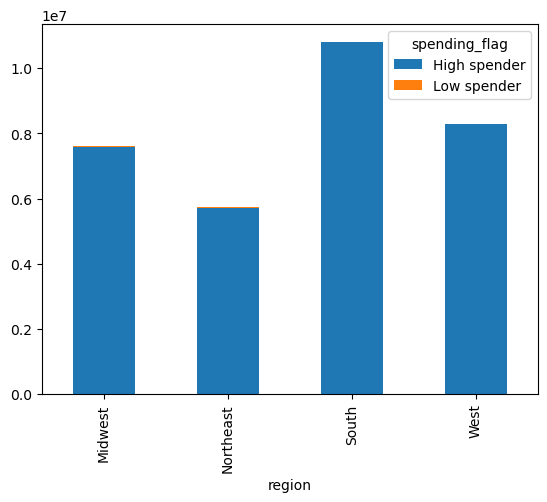

In [75]:
# Create a bar chart for High Spenders + Low Spenders per region
bar_spending_region = crosstab_region_spending.plot.bar(stacked=True)

In [76]:
# Save the visualization as png
bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spending_region.png'))

In [ ]:
merge.columns

In [ ]:
merge.head()

## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [ ]:
# Create crosstab with spending flag between different regions

region_spending_crosstab = pd.crosstab(merge['Region'], merge['spending_flag'], dropna = False) 

In [ ]:
# Crosstab region spending
region_spending_crosstab

# Step 4

## The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [ ]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders)
merge.loc[merge['max_order'] < 5, 'low_order_flag'] = 'Low Activity Customer'

In [ ]:
# Create an exclusion flag for high-activity customers (customers with more than 5 orders)
merge.loc[merge['max_order'] >= 5, 'low_order_flag'] = 'High Activity Customer'

In [ ]:
# Customer activity value counts
merge['low_order_flag'].value_counts(dropna = False)

In [ ]:
# Sample to save on CPU memory
merge = merge[:1000000]

In [ ]:
# Making a sample with high-activity customers only
merge_high_activity_customers = merge[merge['low_order_flag'] == 'High Activity Customer']

In [ ]:
# Export the sample
merge_high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_high_activity.pkl'))

In [ ]:
merge_high_activity_customers.shape

# Step 5

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

# Age

In [ ]:
# Create an Age Profile - Child < 12
merge_high_activity_customers.loc[merge_high_activity_customers['Age'] <= 12, 'Age Profile'] = 'Child'

In [ ]:
# Create an Age Profile - Teen 13 to 17
merge_high_activity_customers.loc[(merge_high_activity_customers['Age'] >= 13) & (merge_high_activity_customers['Age'] <= 17), 'Age Profile'] = 'Teen'

In [ ]:
# Create an Age Profile - Young Adult 18 to 35
merge_high_activity_customers.loc[(merge_high_activity_customers['Age'] >= 18) & (merge_high_activity_customers['Age'] <= 35), 'Age Profile'] = 'Young Adult'

In [ ]:
# Create an Age Profile - Adult 36 to 64
merge_high_activity_customers.loc[(merge_high_activity_customers['Age'] >= 36) & (merge_high_activity_customers['Age'] <= 64), 'Age Profile'] = 'Adult'

In [ ]:
# Create an Age Profile - Old Adult >= 65
merge_high_activity_customers.loc[merge_high_activity_customers['Age'] >= 65, 'Age Profile'] = 'Old Adult'

In [ ]:
merge_high_activity_customers.head()

In [ ]:
# Check age frequency
merge_high_activity_customers['Age Profile'].value_counts(dropna = False)

# Income

In [ ]:
# Histogram of customer income

hist_customer_income = merge_high_activity_customers['income'].plot.hist(bins = 50, color = ['blue'], ec = 'orange')

In [ ]:
# Create Income Profile - Low-income <=50,000
merge_high_activity_customers.loc[merge_high_activity_customers['income'] <= 50000, 'Income Profile'] = 'Low-income'

In [ ]:
# Create Income Profile - Mid-income 50,001 to 75,000
merge_high_activity_customers.loc[(merge_high_activity_customers['income'] >= 50001) & (merge_high_activity_customers['income'] <= 75000), 'Income Profile'] = 'Middle-income'

In [ ]:
# Create Income Profile - High-income 75,001 to 120,000
merge_high_activity_customers.loc[(merge_high_activity_customers['income'] >= 75001) & (merge_high_activity_customers['income'] <= 120000), 'Income Profile'] = 'High-income'

In [ ]:
# Create Income Profile - Very-High-income >120,000
merge_high_activity_customers.loc[merge_high_activity_customers['income'] > 120000, 'Income Profile'] = 'Very High-income'

In [ ]:
merge_high_activity_customers.head()

In [ ]:
# Check income frequency
merge_high_activity_customers['Income Profile'].value_counts(dropna = False)

# Department

### Customers will be labeled as either "Vegan" or "Non-Vegan"

In [ ]:
# Creating a crosstab between Department_ID and User_ID
dep_crosstab = pd.crosstab(merge_high_activity_customers['department_id'], merge_high_activity_customers['user_id'], dropna = False)

In [ ]:
# Assign nutrition flags as Vegan or Non-Vegan
vegan_dict = dict()
for user in dep_crosstab:
    workinglist = dep_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [ ]:
# Assign "vegan_flag"
vegan_flag = []
for user in merge_high_activity_customers['user_id']:
    vegan_flag.append(vegan_dict[user])

In [ ]:
# Add vegan_flag to merge_high_activity_customers as Vegan_profile
merge_high_activity_customers['Vegan Profile'] = vegan_flag

In [ ]:
# First 5 rows of merge_high_activity_customers
merge_high_activity_customers.head()

In [ ]:
# Check Vegan frequency
merge_high_activity_customers['Vegan Profile'].value_counts(dropna = False)

# Family status and number of dependants

In [ ]:
# Check "Status" frequency
merge_high_activity_customers['Status'].value_counts(dropna = False)

In [ ]:
# Create crosstab for "Dependants" and "Status"
family_crosstab = pd.crosstab(merge_high_activity_customers['Status'], merge_high_activity_customers['Dependants'], dropna = False)

In [ ]:
# Check family_crosstab
family_crosstab

In [ ]:
# Creating "Married, no children/dependants" - Married + 0 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] == 'married') & (merge_high_activity_customers['Dependants'] == 0), 'Family Profile'] = 'Married, no children/dependants'

In [ ]:
# Creating "Married, with children/dependants" - Married + >=1 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] == 'married') & (merge_high_activity_customers['Dependants'] >= 1), 'Family Profile'] = 'Married, with children/dependants'

In [ ]:
# Creating "Not Married, no children/dependants" - Not Married + 0 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] != 'married') & (merge_high_activity_customers['Dependants'] == 0), 'Family Profile'] = 'Not Married, no children/dependants'

In [ ]:
# Creating "Not Married, with children/dependants" - Not Married + >=1 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] != 'married') & (merge_high_activity_customers['Dependants'] >= 1), 'Family Profile'] = 'Not Married, with children/dependants'

In [ ]:
merge_high_activity_customers.head()

In [ ]:
# Check "Family Profile" frequency
merge_high_activity_customers['Family Profile'].value_counts(dropna = False)

# Step 6

## Create an appropriate visualization to show the distribution of profiles.

In [ ]:
# Age
age_profile_bar = merge_high_activity_customers['Age Profile'].value_counts(dropna = False).plot.bar(color = ['blue', 'red', 'yellow'])

In [ ]:
# Exporting outside of jupyter in image file
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

In [ ]:
# Income
income_profile_bar = merge_high_activity_customers['Income Profile'].value_counts(dropna = False).plot.bar(color = ['purple', 'red', 'green'])

In [ ]:
# Exporting outside of jupyter in image file
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

In [ ]:
# Vegan or Non-Vegan
vegan_profile_bar = merge_high_activity_customers['Vegan Profile'].value_counts(dropna = False).plot.bar(color = ['purple', 'red'])

In [ ]:
# Exporting outside of jupyter in image file
vegan_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_profile_bar.png'))

In [ ]:
# Family Status
family_profile_bar = merge_high_activity_customers['Family Profile'].value_counts(dropna = False).plot.bar(color = ['yellow', 'red', 'blue'])

In [ ]:
# Exporting outside of jupyter in image file
family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

# Step 7

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
# Stats for Age Profile
merge_high_activity_customers.groupby('Age Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

In [ ]:
# Stats for Income Profile
merge_high_activity_customers.groupby('Income Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

In [ ]:
# Stats for Vegan Profile
merge_high_activity_customers.groupby('Vegan Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

In [ ]:
# Stats for Family Status Profile
merge_high_activity_customers.groupby('Family Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

# Step 8

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Age

In [ ]:
# Create crosstab comparing "Age Profile" and "Region"
age_region_cross = pd.crosstab(merge_high_activity_customers['Age Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [ ]:
# Check age_region_cross
age_region_cross

#### Adult leads every region. Each age profile stays consistant among the different regions

### Income

In [ ]:
# Create crosstab comparing "Income Profile" and "Region"
income_region_cross = pd.crosstab(merge_high_activity_customers['Income Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [ ]:
# Check income_region_cross
income_region_cross

#### Low income leads in every region. Each income profile stays consistant among the different regions

### Vegan / Non-Vegan

In [ ]:
# Create crosstab comparing "Vegan Profile" and "Region"
vegan_region_cross = pd.crosstab(merge_high_activity_customers['Vegan Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [ ]:
# Check vegan_region_cross
vegan_region_cross

#### Large majority in each region is Non-Vegan

### Family Status

In [ ]:
# Create crosstab comparing "Family Profile" and "Region"
family_region_cross = pd.crosstab(merge_high_activity_customers['Family Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [ ]:
# Check family_region_cross
family_region_cross

#### Married, with children/dependants has a large majority in each region. 

In [ ]:
# Export merge_high_activity_customers as .pkl
merge_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merge_high_activity_customers.pkl'))